# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [5]:
target_sort = app_train.corr().sort_values(['TARGET'])
target_sort

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
EXT_SOURCE_3,0.000222,-0.178919,-0.042710,-0.030229,0.043516,0.030752,0.047717,-0.006001,-0.205478,0.113434,...,-0.016152,-0.002590,-0.013837,-0.013058,-0.001193,-0.007190,-0.021258,-0.007856,-0.025131,-0.071449
EXT_SOURCE_2,0.002342,-0.160472,-0.018015,0.060925,0.131228,0.125804,0.139367,0.198924,-0.091996,-0.020767,...,0.001874,0.003256,0.000614,-0.007236,-0.004077,0.000553,0.001507,0.051981,-0.002849,-0.021984
EXT_SOURCE_1,0.000082,-0.155317,-0.138470,0.026232,0.168429,0.119398,0.175502,0.099997,-0.600610,0.289848,...,-0.025739,0.005131,-0.005102,-0.019208,-0.003963,-0.005087,-0.001801,0.030820,-0.003631,0.006562
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,-0.040396,-0.010040,-0.010135,-0.008396,-0.004735,0.000472,0.003072,-0.034457,0.015345,0.049988
FLOORSMAX_AVG,0.004851,-0.044003,-0.009705,0.060171,0.103296,0.130174,0.108512,0.322652,0.001634,-0.015970,...,0.012230,0.000900,-0.002702,-0.005814,0.003101,0.002946,-0.000050,0.046762,-0.000841,-0.019750
FLOORSMAX_MEDI,0.004588,-0.043768,-0.009447,0.059682,0.102770,0.129179,0.107936,0.318319,0.001791,-0.016051,...,0.012105,0.000879,-0.002662,-0.005831,0.003301,0.002752,0.000082,0.045992,-0.000724,-0.019865
FLOORSMAX_MODE,0.004386,-0.043226,-0.009550,0.057675,0.100418,0.126302,0.105532,0.303992,0.001294,-0.015064,...,0.012277,0.000908,-0.002362,-0.005814,0.003470,0.002535,0.000317,0.044121,-0.000361,-0.019111
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,...,0.032748,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,...,0.013367,0.002364,-0.000045,0.003437,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003
ELEVATORS_AVG,0.004862,-0.034199,-0.007060,0.045053,0.080635,0.101439,0.083736,0.280685,-0.001448,-0.009792,...,0.007212,0.001160,-0.004101,-0.004347,0.001187,0.004841,-0.000343,0.043076,-0.004788,-0.018544


In [7]:
#列出目標 (TARGET) 與所有欄位之間相關係數，數值最大 15 個
print('Max 15:')
target_sort.tail(15)['TARGET']

Max 15:


DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

In [8]:
#列出目標 (TARGET) 與所有欄位之間相關係數，數值最小 15 個
print('Min 15:')
target_sort.head(15)['TARGET']

Min 15:


EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
LIVINGAREA_MEDI              -0.032739
Name: TARGET, dtype: float64

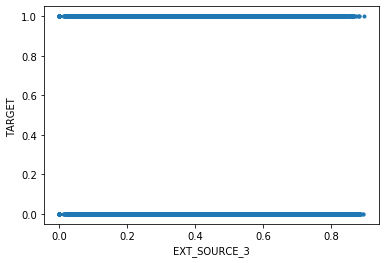

Correlation: -0.1789


In [32]:
# 畫散布圖 
sub_df = app_train[~app_train['EXT_SOURCE_3'].isnull()]
plt.plot(sub_df ['EXT_SOURCE_3'], sub_df['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET ')
plt.show()
corr = np.corrcoef(sub_df ['EXT_SOURCE_3'], sub_df['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))

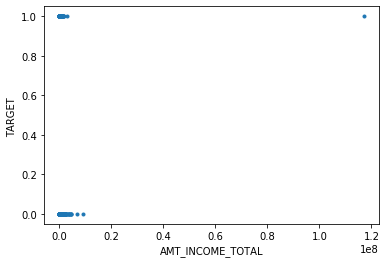

Correlation: -0.0009


In [36]:
# 畫散布圖 -AMT_INCOME_TOTAL
plt.plot(sub_df ['AMT_INCOME_TOTAL'], sub_df['TARGET'], '.')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('TARGET ')
plt.show()
corr = np.corrcoef(sub_df ['AMT_INCOME_TOTAL'], sub_df['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))

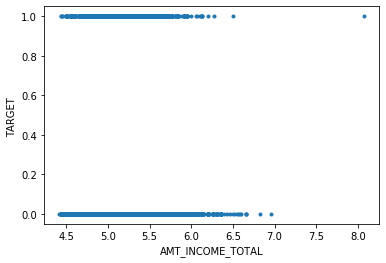

Correlation: -0.0140


In [37]:
# 畫散布圖 ,取 log
plt.plot(np.log10(sub_df ['AMT_INCOME_TOTAL']), sub_df['TARGET'], '.')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('TARGET ')
plt.show()
corr = np.corrcoef(np.log10(sub_df ['AMT_INCOME_TOTAL']), sub_df['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))